# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»

Регина, здравствуйте!

Замечательная работа, отлично, что еще построили и логистическую регрессию :)

Рекомендую вам для дальнейшего углубления ознакомиться с тем, как настраивать параметры модели, чтобы получать еще более точные результаты:

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression (здесь даже на аналогичном датасете)

https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

Зачет!

In [18]:
#пример по ссылки https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
#Загрузка набора данных
#Мы сосредоточим наш анализ на наборах данных 2D. 
from sklearn import datasets
iris = datasets.load_iris()

X1_sepal = iris.data[:,[0,1]]
X2_petal = iris.data[:,[2,3]]
y = iris.target

print(X1_sepal[1:5,:])
print(X2_petal[1:5,:])
print(y)  

[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'Petal width')

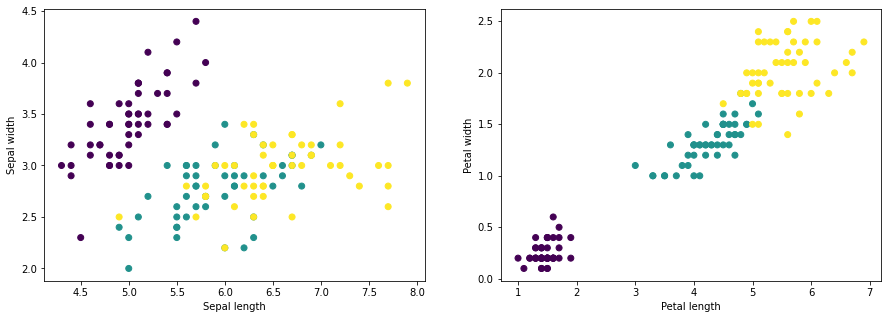

In [20]:
#Visualising the data
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(X2_petal[:, 0], X2_petal[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [21]:
#Create function used to plot decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

In [22]:
#Splitting and scaling the dataset
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
## SPLITTING


X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X1_sepal,y,test_size=0.3,random_state=0)

print("# training samples sepal: ", len(X_train_sepal))
print("# testing samples sepal: ", len(X_test_sepal))

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X2_petal,y,test_size=0.3,random_state=0)

print("# training samples petal: ", len(X_train_petal))
print("# testing samples petal: ", len(X_test_petal))

#####################################################################
## SCALING

sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std = sc.transform(X_test_sepal)

sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train_petal)
X_test_petal_std = sc.transform(X_test_petal)

#####################################################################
## COMBINING FOR FUTURE PLOTTING

X_combined_sepal_standard = np.vstack((X_train_sepal_std,X_test_sepal_std))
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

X_combined_petal_standard = np.vstack((X_train_petal_std,X_test_petal_std))
Y_combined_petal = np.hstack((y_train_petal, y_test_petal))

# training samples sepal:  105
# testing samples sepal:  45
# training samples petal:  105
# testing samples petal:  45


Testing different parameters to understand how accuracies change.¶
Understanding how decision regions change when using different regularization values.¶
Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.
1. Testing sepal data with different regularization values.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

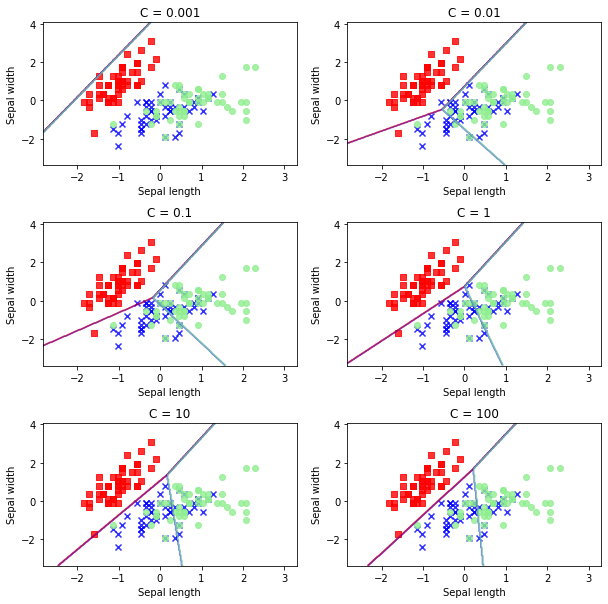

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import learning_curve, GridSearchCV

C_param_range = [0.001,0.01,0.1,1,10,100]

sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = lr.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = lr
                      , test_idx = range(105,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('C = %s'%i)

Комментарии к модели чашелистика:
Как видите, между областями принятия решений для этого набора данных есть очень небольшие различия. Поскольку логистическая регрессия является линейной, этот алгоритм не может сильно изменить модель классификации, поскольку данные не разделены линейно.

2. Testing petal data with different regularization values.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

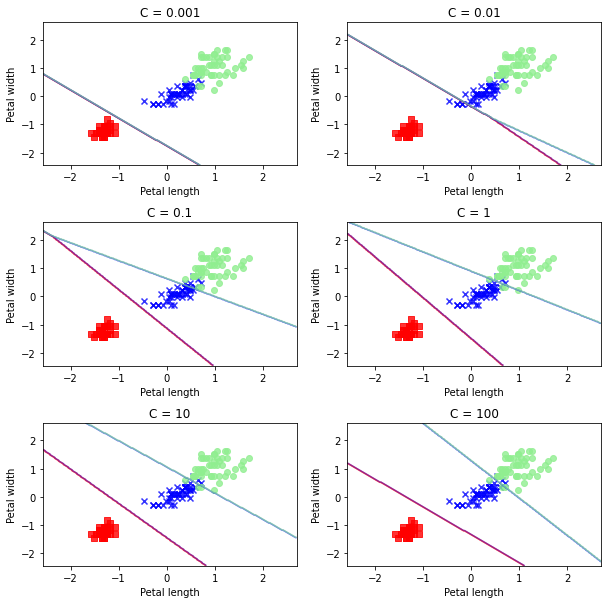

In [24]:
petal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
petal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = lr.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = lr
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('C = %s'%i)

Комментарии лепестка
Здесь эффект от использования разных значений регуляризации вполне очевиден. Как мы упоминали ранее, небольшие значения C увеличивают силу регуляризации, что подразумевает создание простых моделей, которые, как правило, не соответствуют данным. Используя большие значения C, модель может повысить ее сложность и лучше адаптироваться к данным.

Понимание того, какие параметры C лучше всего использовать.
Уместно задать вопрос: какие значения C мы должны использовать?
Есть способ проверить, какие значения C. Идея состоит в том, чтобы понять, как каждое значение C влияет на точность обучающего набора и набора для тестирования. Помните, что наша цель - всегда создавать модель, которая может быть обобщена на невидимые данные.
Способ сделать это - построить кривые валидации.
Использование проверочных кривых для обоих наборов данных.

(0.5, 1.0)

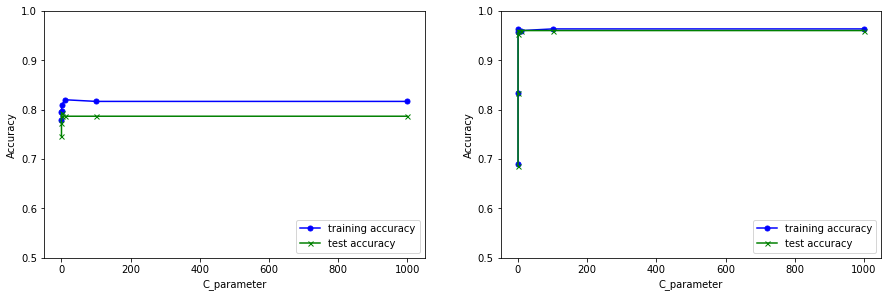

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve



### 1. Use of validation curves for both datasets.
C_param_range = [0.001,0.01,0.1,1,10,100,1000]

plt.figure(figsize=(15, 10))

# Apply logistic regression model to training data
lr = LogisticRegression(penalty='l2',C = i,random_state = 0)

# SEPAL Plot validation curve
train_sepal_scores, test_sepal_scores = validation_curve(estimator=lr
                                                            ,X=X_combined_sepal_standard
                                                            ,y=Y_combined_sepal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            )

train_sepal_mean = np.mean(train_sepal_scores,axis=1)
train_sepal_std = np.std(train_sepal_scores,axis=1)
test_sepal_mean = np.mean(test_sepal_scores,axis=1)
test_sepal_std = np.std(test_sepal_scores,axis=1)

plt.subplot(2,2,1)
plt.plot(C_param_range
            ,train_sepal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_sepal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])



# PETAL Plot validation curve
train_petal_scores, test_petal_scores = validation_curve(estimator=lr
                                                            ,X=X_combined_petal_standard
                                                            ,y=Y_combined_petal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            )


train_petal_mean = np.mean(train_petal_scores,axis=1)
train_petal_std = np.std(train_petal_scores,axis=1)
test_petal_mean = np.mean(test_petal_scores,axis=1)
test_petal_std = np.std(test_petal_scores,axis=1)

plt.subplot(2,2,2)
plt.plot(C_param_range
            ,train_petal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_petal_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

Комментарий к кривым валидации:
1. Как мы видели для проверочных кривых, набор данных чашелистиков имеет гораздо более низкую точность, чем лепестковый.
2. Набор данных лепестка продолжает увеличивать свою обучающую точность, если вы позволяете модели быть настолько сложной, насколько вам нравится.
Итак, какой C мы используем?
Возможно, вы догадались, но идея состоит в том, чтобы выбрать тот C, который предлагает наименьшую разницу между точностью обучения и тестирования (помните, что мы хотим обобщить нашу модель на невидимые данные).

In [ ]:
Преподаватель: Олег Булыгин
Домашнее задание
http://prntscr.com/umci7o

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
https://scikit-learn.org/stable/modules/model_evaluation.html

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors #визиализирует, помогает окрасить точки

In [5]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)], #цифры цвета
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [6]:
iris = load_iris()

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target 
data_class
#iris.target, feature_names из библеотеки импортировали
#внизу категории цветов iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
data.drop(columns = data.columns[2:4], inplace = True)
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [11]:
# разделяем выборку на тренировочную и тестовую
#тренируемся на известных данных. часть данных для проверки, 
#а часть для изучения. так делим модель
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2)

In [12]:
len(y_test)

30

In [13]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
#создаем класс
lda = LinearDiscriminantAnalysis()

In [15]:
#обучаем данные на тренировочных данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [16]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2])

In [17]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
#predict делает прогноз уже обученой модели наших отложеных обученых моделей 
#максимально оптимальные параметры переменных в0, в1 и т.д.
#y-test это специально для проверки на основе x-testa

In [18]:
result
#если одинковые то совпало и ошибок нет len(y_test)=45
#видны ошибки 2, 5 строчка

,0,1
0,0,0
1,0,0
2,2,2
3,2,2
4,0,0
5,0,0
6,0,0
7,1,1
8,1,2
9,0,0


In [19]:
# расчет точности (accuracy_score)  - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, lda.predict(X_test))
#точность модели показывает
#если  классы несбалансированные, то точность будет плохой метрикой
#использовать другие метрики в таком случае 

0.8333333333333334

In [21]:
# коэффициенты дискриминатных линий (КДЛ)
#13 признаков соответствует нашим признакам
#КДЛ, чем больше число по модулю, тем сильнее влияет данный показатель на
#определение влияния
#alcalinity_of_ash например 2й (sepal width (cm)) показатель больше всего влияет на
#пренадлежность данного объекта к той или иной категории
lda.coef_

array([[-6.73549319,  8.37303716],
       [ 1.95090607, -3.83964633],
       [ 5.01434505, -4.58964038]])

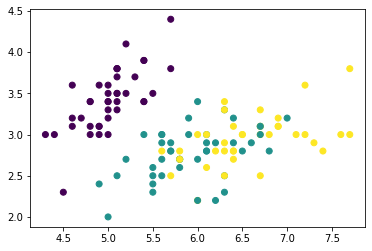

In [23]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()
#на 3 категории разделен график и по 2м сложно их разделить, оставляем 2 категории

In [114]:
#оставлем 0 и 2 категорию
small_train = X_train[(y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 1) | (y_test == 2)]

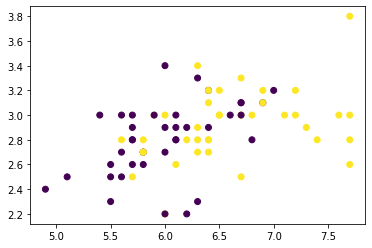

In [115]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()
#1 и 2 пересекаются снова

In [116]:
#оставлем 0 и 2 категорию
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

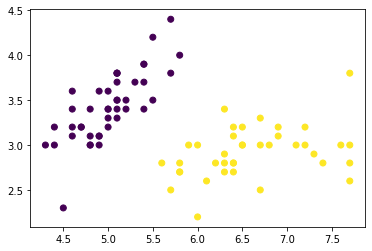

In [117]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()


In [118]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [119]:
# посмотрим на наши центроиды (определяет центры)
lda_small.means_

array([[5.01162791, 3.43255814],
       [6.60263158, 2.91842105]])

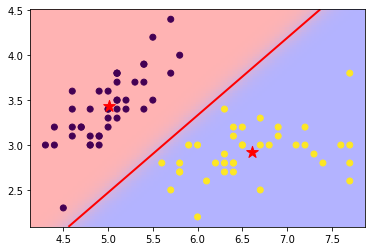

In [122]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')

In [123]:
lda_small.coef_
# второй признак в 12 раз важнее первого для кластеризации (это видно по визуализации)

array([[ 10.70313225, -12.43984465]])

In [124]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))
#уже близкая к 1.0

0.9473684210526315

In [126]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(small_train, sy_train)

LogisticRegression()

In [127]:
lr.predict(small_test)

array([2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2])

In [128]:
accuracy_score(sy_test, lr.predict(small_test))

0.9473684210526315

In [129]:
lr.coef_

array([[ 3.04157319, -1.97219752]])

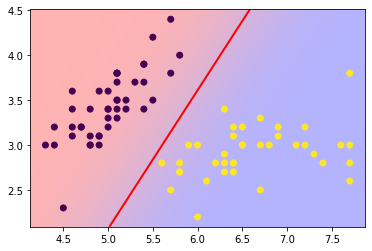

In [130]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')

plt.show()

# Кластеризация

In [131]:
from sklearn.datasets import make_moons, make_blobs

In [132]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [133]:
X

array([[-5.64407835,  3.43599266],
       [ 0.27953864,  5.2001965 ],
       [-3.1978651 ,  5.53377398],
       [-2.96650615,  5.09205367],
       [-0.33388677,  9.66467508],
       [ 6.7103947 ,  7.43843119],
       [ 9.04845057,  4.7796738 ],
       [ 8.86949497,  7.41222664],
       [-2.95887496,  5.72358544],
       [-3.94274227,  1.28328663],
       [14.38172288,  9.57428109],
       [13.91859896,  8.11596593],
       [ 7.01811708,  8.3285074 ],
       [ 7.44376438, 13.58264489],
       [-3.22864819,  3.95832794],
       [ 4.82006959,  6.96992477],
       [-6.08163607, -1.93709086],
       [ 9.28404128,  7.22323509],
       [ 7.5556356 , 11.23689735],
       [-1.77761791,  3.74658311],
       [-3.03728514,  1.64712913],
       [-1.08701149,  2.87738448],
       [-3.58961183,  3.66130137],
       [-7.64718463,  5.56133609],
       [-2.98766909, -2.24082708],
       [ 7.60235718,  6.50721002],
       [-4.68063581,  4.77114522],
       [10.81036654,  7.74071475],
       [-2.17927881,

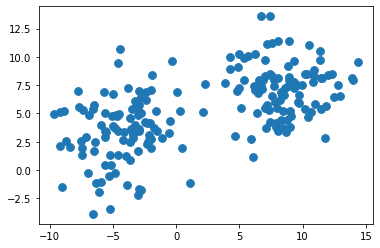

In [136]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

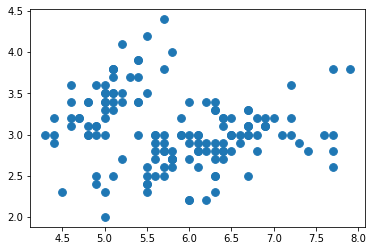

In [137]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='autumn', s=60)

In [140]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

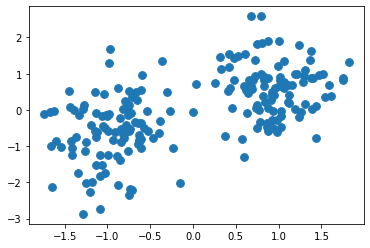

In [143]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)
#масштаб изменился примерно одинаковый стал

In [144]:
from sklearn.cluster import KMeans

In [152]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2) #количество кластеров для разделения
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0])

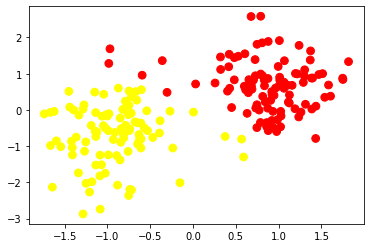

In [153]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)
#определение кластеров

In [154]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k) #обучение
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

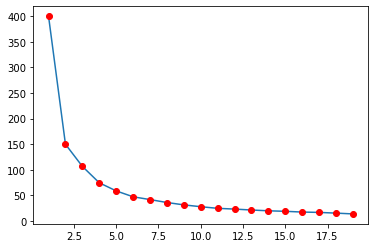

In [155]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
#визуализируем локоть и примерно выбираем 3

# Иерархическая кластеризация

In [156]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy 
#тут иерархическая библиотека

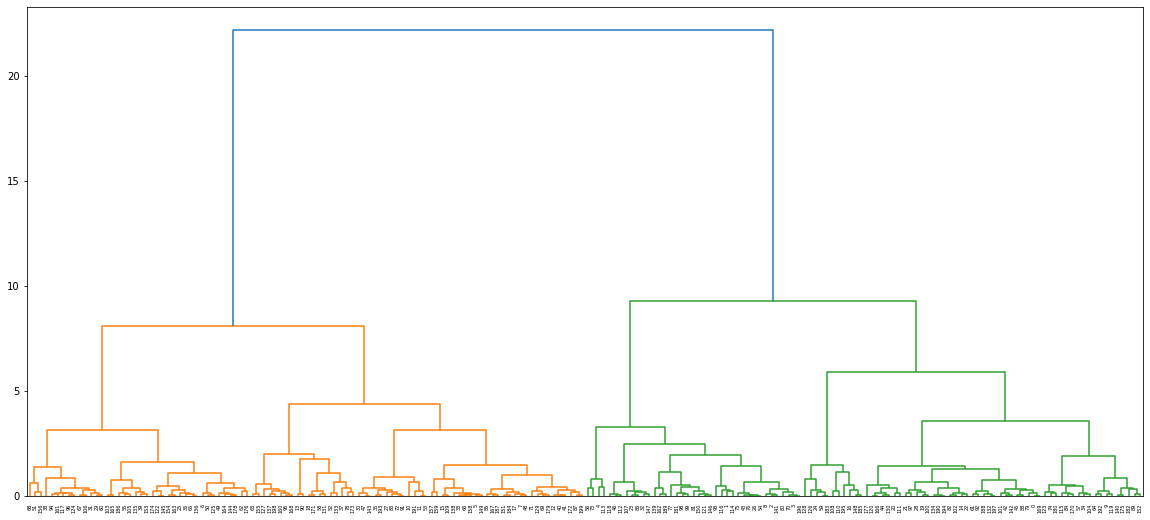

In [157]:
# строим дендрограмму
distance_mat = pdist(X_scaled) 
# pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) 
# linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward') #метод ближних кластеров
#метод Уорлда
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [158]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [162]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

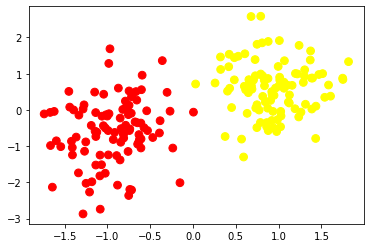

In [163]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
Вывод:
    На графике получилась нормальная выборка по 2м признакам. 
    Точность модели показывает = 0.94, значение близко к 1.0 
    и значит мы можем использовать данную метрику.
    И значит что мы можем использовать данную модель 
    для дальнейщего прогностического анализа и предсказания будущего поведения.
